# Downloading Data

Matthes, E. (2023). 16 Downloading Data. In *Python Crash Course* (3rd ed.). No Starch Press.

Resources: https://github.com/ehmatthes/pcc_3e/tree/main

Downloading datasets from online sources and working visualizations of that data.

## Index



## The CSV file format

### Parsing the CSV File Headers



In [1]:
### Lets examine the first line of csv file, the headers

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() # reading the file and we get a list of all lines in the file with 'splitlines()'

reader = csv.reader(lines) # process the first line of comma-separated valies and stores as a list
header_row = next(reader) # the 'next()' function show the next line in the file, starts for the beggining
print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


### Printing the Headers and their positions


In [20]:
### Printing heach position of the headers

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_2021_full.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

for index, column_header in enumerate(header_row): # Enumerate function returns both the index of each item and the value of each intem
    print(index, column_header)


0 STATION
1 NAME
2 DATE
3 AWND
4 PGTM
5 PRCP
6 TAVG
7 TMAX
8 TMIN
9 WDF2
10 WDF5
11 WSF2
12 WSF5
13 WT01
14 WT02
15 WT04
16 WT05
17 WT08
18 WT09


### Extracting and reading Data


In [3]:
### reading data from csv

from pathlib import Path 
import csv 

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

# High temperatures
highs = [int(row[4]) for row in reader] # new list 'highs' with a loop
# it beggins in the second line because previously we reed the headers row
# we pull the tdata from index 4 on each loop pass
# and we convert the data into integer with 'int()'

print(highs)



[61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66]


### Plotting data ina temperature chard


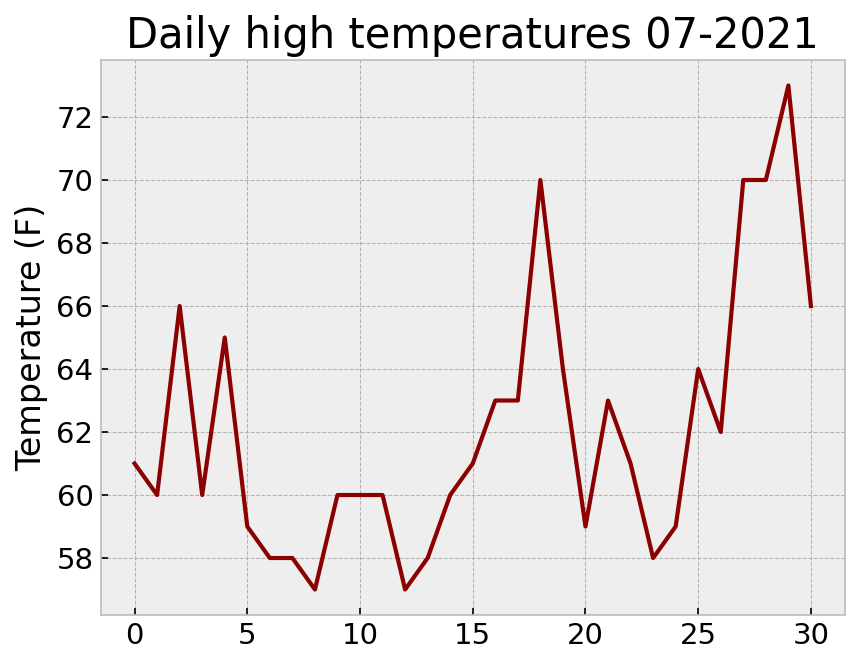

In [8]:
from pathlib import Path 
import csv 

import matplotlib.pyplot as plt

path = Path("weather_data/sitka_weather_07-2021_simple.csv")
lines = path.read_text().splitlines() 

reader = csv.reader(lines) 
header_row = next(reader) 

# High temperatures
highs = [int(row[4]) for row in reader]

plt.style.use('bmh')
fig, ax = plt.subplots(dpi=150)
ax.plot(highs, color="darkred")

# Format plot
ax.set_title("Daily high temperatures 07-2021", fontsize=20)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=14)

plt.show()

Alternative:
```python
from pathlib import Path 

import pandas as pd
import plotly.express as px

path = Path("weather_data/sitka_weather_07-2021_simple.csv")

reader = pd.read_csv(path) # we use pandas to reed the csv

# High temperatures
fig = px.line(reader, x='DATE', y='TMAX', title="Daily high temperatures 07-2021", color_discrete_sequence=["darkred"], width=900)
# x and y are the labels from the csv file

fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Temperature (°F)")
fig.update_legends(title_text="Temp")

fig.show()
```

### The datatime module

Date and Time Formatting Arguments from the datetime Module
```
Argument - Meaning
%A - Weekday name, such as Monday
%B - Month name, such as January
%m - Month, as a number (01 to 12)
%d - Day of the month, as a number (01 to 31)
%Y - Four-digit year, such as 2019
%y - Two-digit year, such as 19
%H - Hour, in 24-hour format (00 to 23)
%I - Hour, in 12-hour format (01 to 12)
%p - AM or PM
%M - Minutes (00 to 59)
%S - Seconds (00 to 61)
```

In [2]:
from datetime import datetime

first_date = datetime.strptime("2021-07-01", "%Y-%m-%d")

print(first_date) 

2021-07-01 00:00:00


### Plotting dates



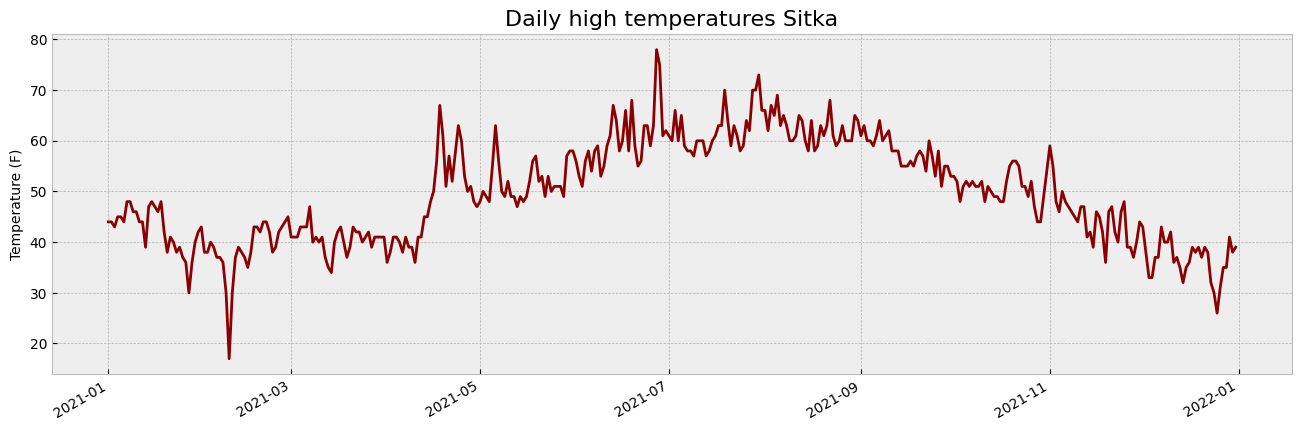

In [8]:
from pathlib import Path 
import csv 
from datetime import datetime

import matplotlib.pyplot as plt

# path = Path("weather_data/sitka_weather_07-2021_simple.csv")
path = Path("weather_data/sitka_weather_2021_simple.csv")
lines = path.read_text().splitlines() 

### Using two comprehensions with csv reader we need to read the csv once per comprehension
reader = csv.reader(lines) 
header_row = next(reader) 
dates = [datetime.strptime(row[2], "%Y-%m-%d") for row in reader] # converting data in row 2 to datetime object

reader2 = csv.reader(lines)
header_row2 = next(reader2)
highs = [int(row[4]) for row in reader2]

### Alternative to create dates and highs with a for loop
# dates, highs = [], []
# for row in reader:
#    current_date = datetime.strptime(row[2], '%Y-%m-%d')
#    high = int(row[4])
#    dates.append(current_date)
#    highs.append(high)

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(dates, highs, color="darkred")

# Format plot
ax.set_title("Daily high temperatures Sitka", fontsize=16)
ax.set_xlabel("", fontsize=10)
fig.autofmt_xdate() # This print the dates diagonally to prevent overlapping
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

### Ploting a second data series and shading the area between

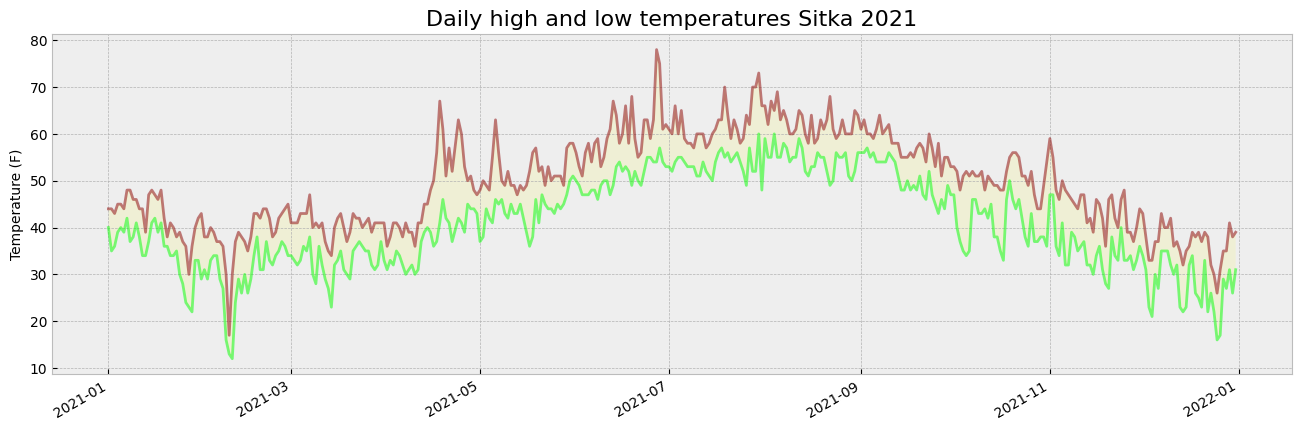

In [12]:
from pathlib import Path 
import csv 
from datetime import datetime

import matplotlib.pyplot as plt

# path = Path("weather_data/sitka_weather_07-2021_simple.csv")
path = Path("weather_data/sitka_weather_2021_simple.csv")
lines = path.read_text().splitlines() 

### Using two comprehensions with csv reader we need to read the csv once per comprehension
reader = csv.reader(lines) 
header_row = next(reader) 
dates = [datetime.strptime(row[2], "%Y-%m-%d") for row in reader] # converting data in row 2 to datetime object

reader2 = csv.reader(lines)
header_row2 = next(reader2)
highs = [int(row[4]) for row in reader2]

reader3 = csv.reader(lines)
header_row3 = next(reader3)
lows = [int(row[5]) for row in reader3]

### Alternative to create dates and highs with a for loop
# dates, highs = [], []
# for row in reader:
#    current_date = datetime.strptime(row[2], '%Y-%m-%d')
#    high = int(row[4])
#    dates.append(current_date)
#    highs.append(high)

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(dates, highs, color="darkred", alpha=0.5) # Alpha argument controls the colors transparency, 0=transparent and 1=opaque
ax.plot(dates, lows, color="lime", alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor="yellow", alpha=0.1) 
# Passing dates as x-value and highs/lows as y-values. Facecolor is the color for the shaded region

# Format plot
ax.set_title("Daily high and low temperatures Sitka 2021", fontsize=16)
ax.set_xlabel("", fontsize=10)
fig.autofmt_xdate() # This print the dates diagonally to prevent overlapping
ax.set_ylabel("Temperature (F)", fontsize=10)
ax.tick_params(labelsize=10)

plt.show()

### Error Checking